#  Step 1 ：探索美联储的网站

---

我们抓取网站信息，首先需要学习分析网站的内容和结构。通过分析网站的结构后，再决定选择什么的工具来进行信息的获取。

本次任务主要是通过分析美联储的网站进行分析，采用python的基础库（urllib.request）和BeatifulSoup来实现，并通过python的文件操作来存储抓取结果，实现本地化存储。

1. 学习观察和分析网站
2. 学习基本库的使用
3. 学习对 BeautifulSoup对象的基本分析，得到想要的结果
4. 存储结果。





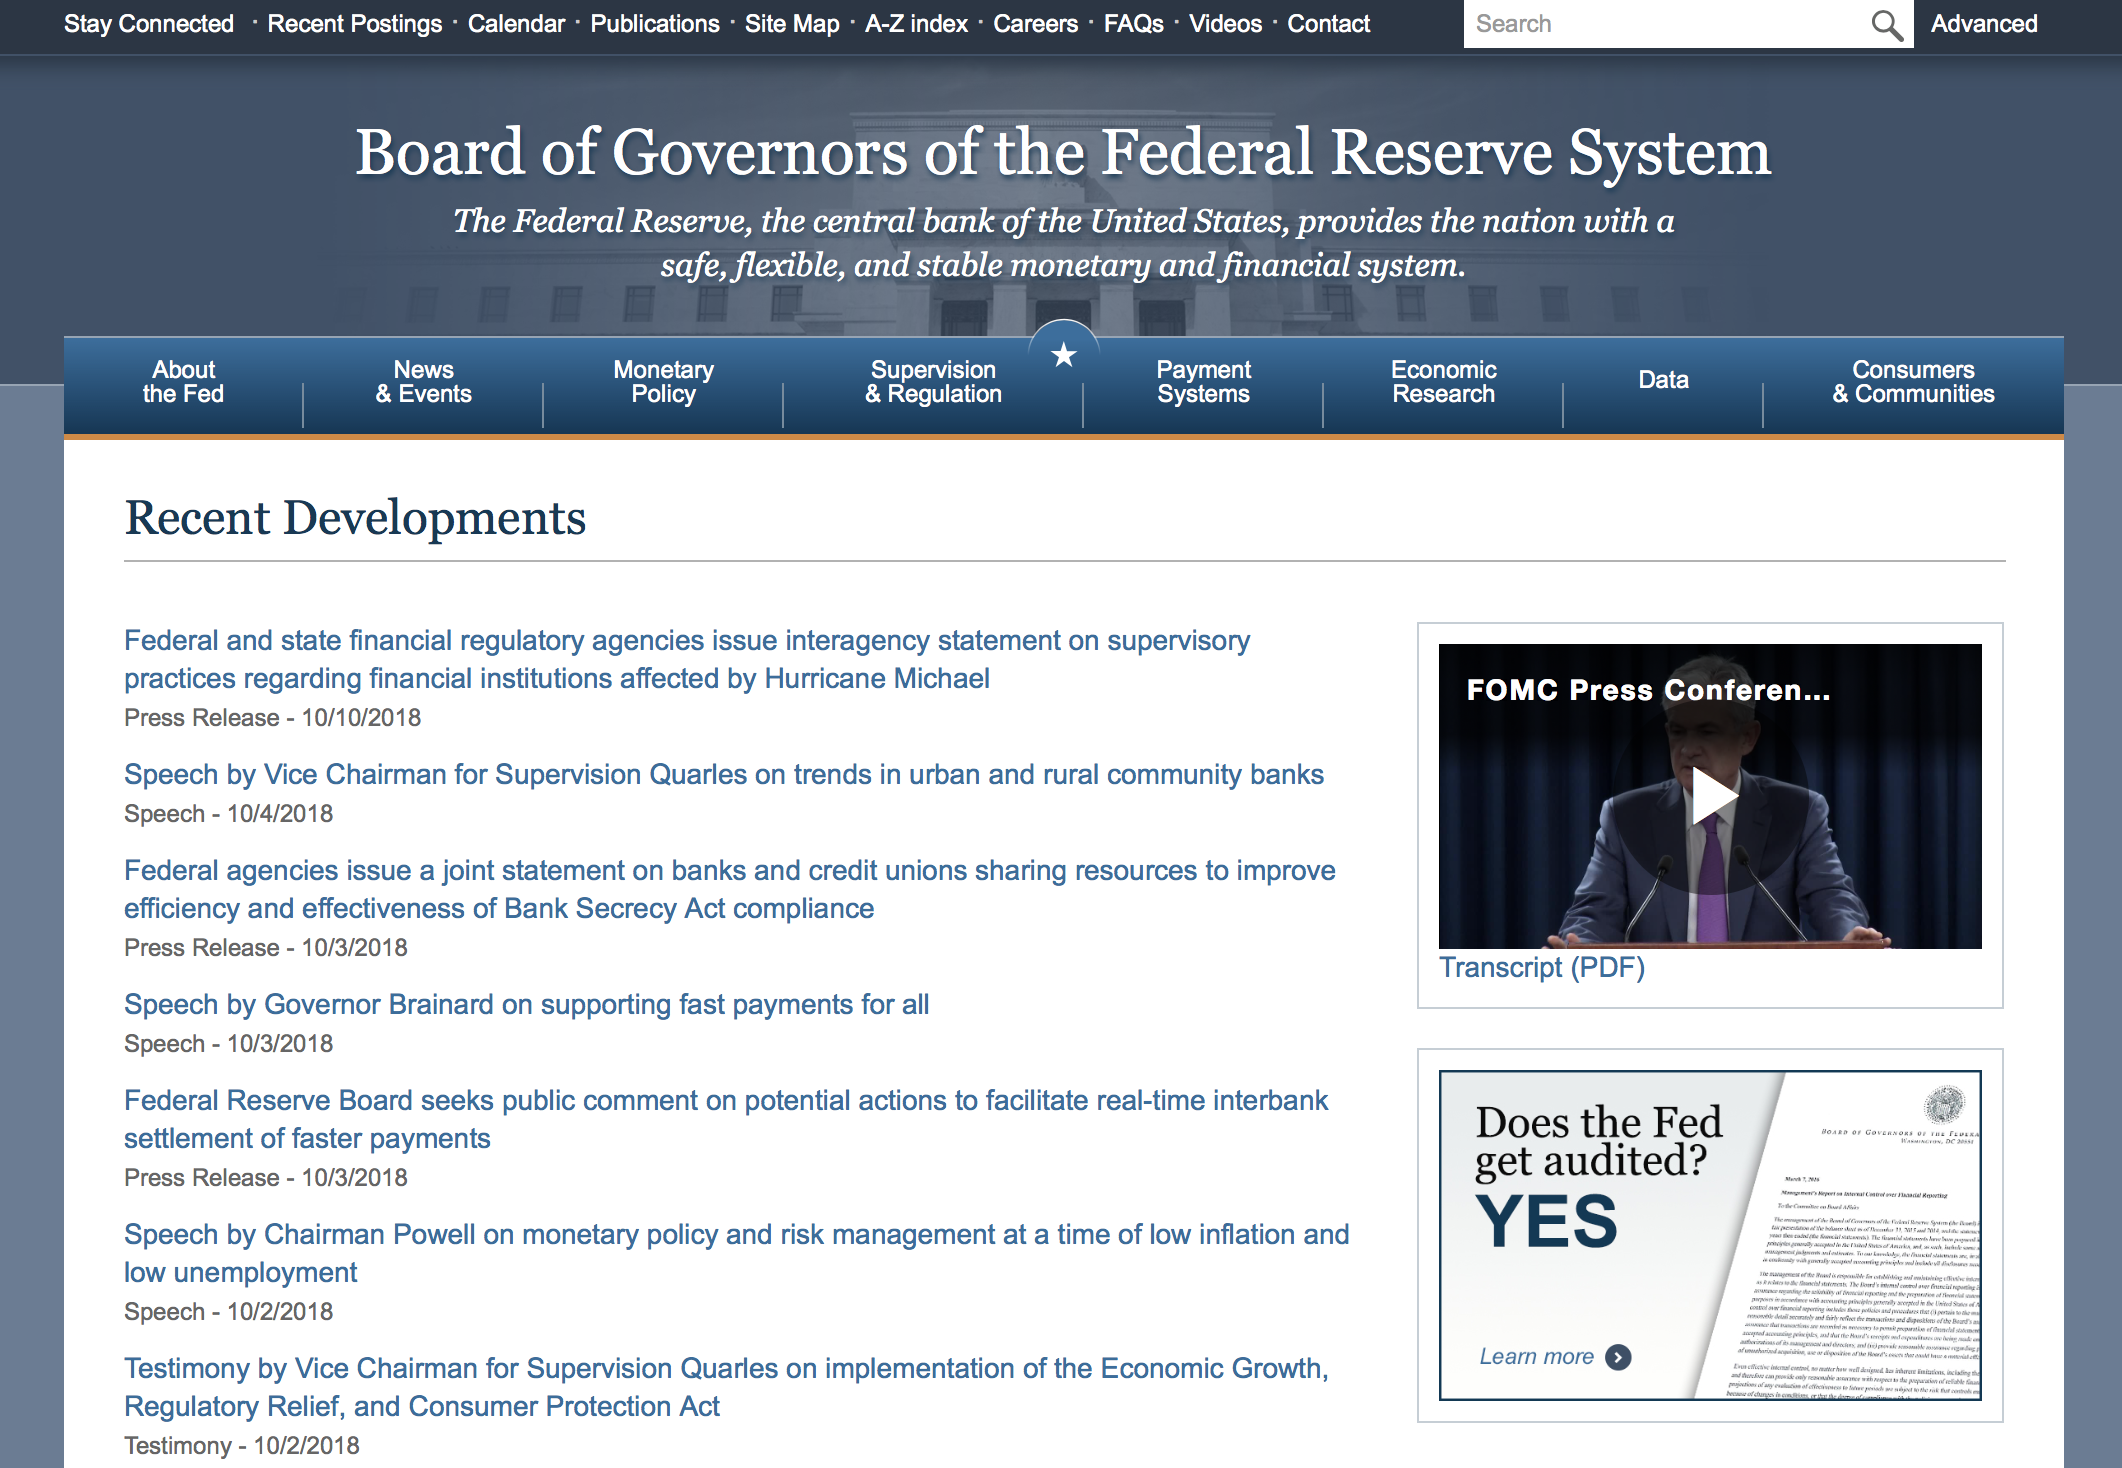

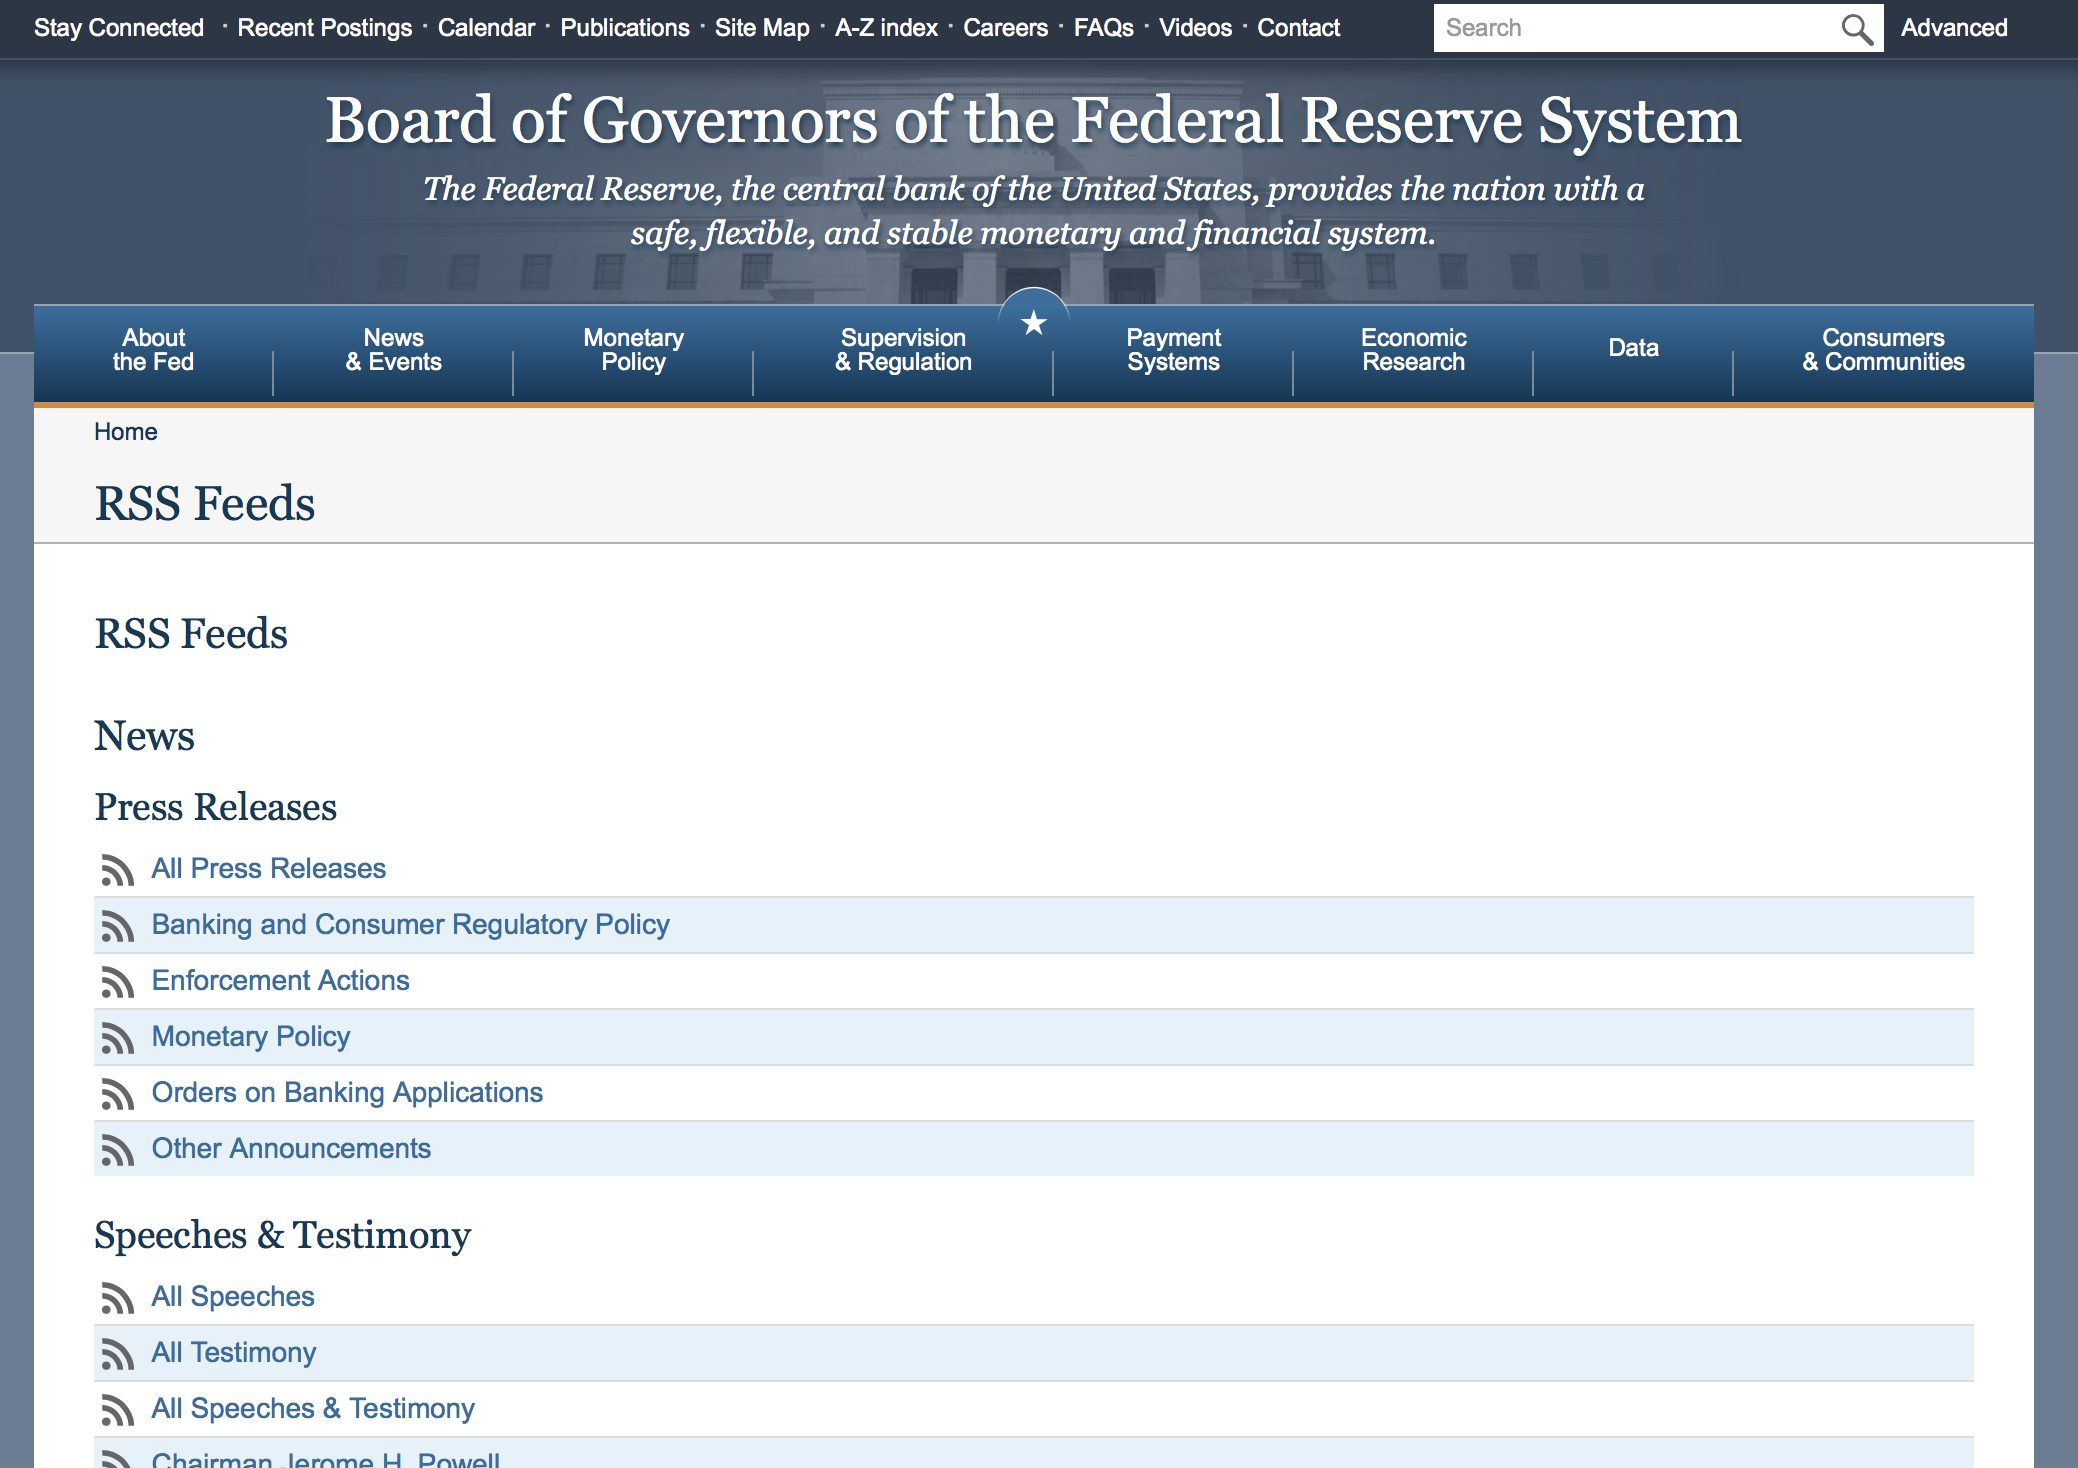

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

设置美联储金融政策的RSS源地址，并通过BeautifulSoup库进行处理分析。

In [2]:
base_html = urlopen("https://www.federalreserve.gov/feeds/press_monetary.xml")
bsobj = BeautifulSoup(base_html,"xml")

我们看看通过BeautifulSoup获取到的内容：

In [3]:
bsobj

<?xml version="1.0" encoding="utf-8"?>
<rss version="2.0">
<channel>
<title>FRB: Press Release - Monetary Policy</title>
<link>https://www.federalreserve.gov/feeds/feeds.htm</link>
<description>Press releases about monetary policy from the Federal Reserve Board</description>
<language>en</language>
<item>
<title>Minutes of the Board's discount rate meeting on November 8, 2018</title>
<link>https://www.federalreserve.gov/newsevents/pressreleases/monetary20181204a.htm</link>
<guid>https://www.federalreserve.gov/newsevents/pressreleases/monetary20181204a.htm</guid>
<description>Minutes of the Board's discount rate meeting on November 8, 2018</description>
<category>Monetary Policy</category>
<pubDate>Tue, 4 Dec 2018 19:00:00 GMT</pubDate>
</item>
<item>
<title>Minutes of the Federal Open Market Committee, November 7-8, 2018</title>
<link>https://www.federalreserve.gov/newsevents/pressreleases/monetary20181129a.htm</link>
<guid>https://www.federalreserve.gov/newsevents/pressreleases/moneta

这种显示不够舒服，有没有更舒服一些的显示方式呢？

In [ ]:
print(bsobj.prettify())

这样似乎好一点，但每个文章之间没有间隔，分不出每一篇文章，有没有办法可以解决？

In [ ]:
# 读取文章的链接地址，用于抓取网页内容

for item in bsobj.findAll('item'):
    print(item)
    print("-----------------------------------")

嗯，有了分割线，这样清楚多了。

In [ ]:
for item in bsobj.findAll('item'):
    print(item.title)
    print(item.link)
    print(item.description)
    print(item.category)
    print(item.pubDate)
    print("-----------------------------------")

这样结果也是一样的，但我们看到采用这种方式，我们就可以来重新调整我们的输出了。比如下面，我们只想显示title，link，和日期。

In [ ]:
for item in bsobj.findAll('item'):
    print(item.title)
    print(item.link)
    print(item.pubDate)
    print("-----------------------------------")

上面的结果还是有一些html标记，我们如果只想显示具体内容呢？可以这样：

In [ ]:
for item in bsobj.findAll('item'):
    print(item.pubDate.contents,"\n",item.title.contents,"\n",item.link.contents)
    print("-----------------------------------")

BeautifulSoup就像一把精巧的手术刀，可以很好地处理这些标记问题，按照我们的想法来展示内容。

下面，我们可以把我们想要的结果保存下来，作为下一步网页抓取的工作清单（TO-DO-List）。

## 作业1：
---

1. 根据以上的代码，请将（https://www.federalreserve.gov/feeds/press_monetary.xml） 提供的rss的内容下载下来，保存成为一个文本文件（文件名：fr_monerary.txt)，每一条rss记录为一行。

2. 根据以上代码，请将（https://www.federalreserve.gov/feeds/press_monetary.xml） 提供的rss的内容下载下来，保存成为一个csv格式文件（文件名：fr_monerary.csv)，每一条rss记录为一行，增加第一行为标题行，依次为```Titile， Link， Description，Category，Date```，每一条rss内容与标题行对应。






## 作业2：
---

根据以上代码，请将（https://www.federalreserve.gov/feeds/press_monetary.xml） 提供的rss的内容下载下来，保存成为一个html格式文件（文件名：fr_monerary.html)，每一条rss记录为一行，增加第一行为标题行，依次为```Titile， Link， Description，Category，Date```，每一条rss内容与标题行对应。

要求：
1. html页面中通过设计一个表格来显示结果。
2. 表格第一行为标题，依次```Titile， Link， Description，Category，Date```。
3. 每一条RSS记录对应表格一行，对应标题显示内容。

**以下为可选功能实现，如果有能力可以尝试：**

为html提供分页浏览功能，包括：

1. 表格每一页显示多少条，可以提供选项进行设置（如10条，20条，50条）；
2. 提供分页查看功能，提供前一页和后一页的操作选项。



## 作业3（可选）：
---
此作业为学有余力的同学选做。

1. 根据以上的代码，请将（https://www.federalreserve.gov/feeds/press_monetary.xml） 提供的rss的内容下载下来，保存成为一个sqlite的数据库文件，数据库名字为ft_monerary.db。